In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch

from scipy.io import loadmat

## Load data from h5 file

In [22]:
# Load data
with h5py.File(r'C:\Users\Matteo\Shallow-Water-Equations\data\swe1d_2500.h5', 'r') as file:
    # Check if the dataset exists
    data = {key: file[key][:] for key in file.keys()}

keys = [key for key in data.keys()]

a = np.array([data[key][0] for key in keys])
u = np.array([data[key][1] for key in keys])

print(a.shape)
print(u.shape)

(2500, 2, 256)
(2500, 2, 256)


(256,)
(2500, 3, 256)
train_x: torch.Size([2000, 3, 256])
train_y: torch.Size([2000, 2, 256])
test_x: torch.Size([500, 3, 256])
test_y: torch.Size([500, 2, 256])


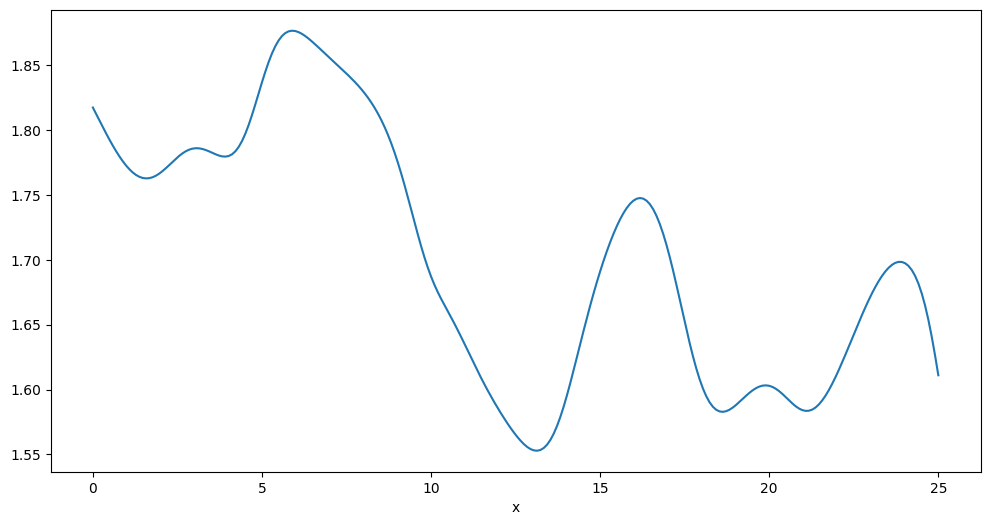

In [25]:
mesh = np.linspace(0, 25, u.shape[-1])
print(mesh.shape)
mesh_shape_corrected = np.repeat(mesh[np.newaxis, np.newaxis, :], u.shape[0], axis=0)
a_with_mesh = np.concatenate((a, mesh_shape_corrected), axis=1)
print(a_with_mesh.shape)

n_train = 2000

train_x, test_x = torch.tensor(a_with_mesh[:n_train], dtype=torch.float32), torch.tensor(a_with_mesh[n_train:], dtype=torch.float32)
train_y, test_y = torch.tensor(u[:n_train], dtype=torch.float32), torch.tensor(u[n_train:], dtype=torch.float32)

# Print shapes
print(f"train_x: {train_x.shape}")
print(f"train_y: {train_y.shape}")

print(f"test_x: {test_x.shape}")
print(f"test_y: {test_y.shape}")
 

h = train_y[0,0,:]

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(mesh, h)
plt.xlabel("x")
plt.show()